In [267]:
import pandas as pd
import numpy as np
import datetime as dt
import pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
import itertools
import scipy.stats as scs
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.cm as cm
from IPython.display import HTML, display

In [268]:
df = pd.read_csv("IS.csv")

In [269]:
df.columns = df.columns.str.lstrip()

In [270]:
df.columns = df.columns.str.lower()

In [271]:
df.columns = df.columns.str.replace(" ", "_")

In [272]:
df.head(35)

,activity_type,user_id,rm_id,user_os,viewing_app,viewing_app_version,user_groups,shared_date,shared_time,title_of_content,share_channel,viewed,time_spent_in_seconds,last_activity_date,last_activity_time
0,VIEW,5677458,NaN,WINDOWS_7,CHROME,NaN,NaN,NaN,NaN,ICP-10100 Datasheet v0.5 (002).pdf,NaN,1,20,28-Aug-2017,20:57:36
1,VIEW,2975237,NaN,WINDOWS_7,CHROME51,NaN,NaN,NaN,NaN,ICM-30631 Datasheet,NaN,1,5,28-Aug-2017,20:48:50
2,VIEW,2841324,NaN,WINDOWS_7,CHROME,NaN,NaN,NaN,NaN,IAM-20680 v1.2 Datasheet & Register Map,NaN,1,100,28-Aug-2017,12:01:32
3,VIEW,3330854,NaN,WINDOWS_7,IE11,NaN,NaN,NaN,NaN,IAM-20680 v1.2 Datasheet & Register Map,NaN,1,490,28-Aug-2017,12:00:38
4,SHARE,3330854,2841324.0,NaN,NaN,NaN,InvenSense Employee Users,28-Aug-2017,11:58:55,IAM-20680 v1.2 Datasheet & Register Map,WEB,1,505,28-Aug-2017,11:58:55
5,VIEW,2841324,NaN,WINDOWS_7,CHROME,NaN,NaN,NaN,NaN,IAM-20680 v1.2 Datasheet & Register Map,NaN,1,50,28-Aug-2017,11:56:49
6,VIEW,2773361,NaN,WINDOWS_10,CHROME,NaN,NaN,NaN,NaN,ICP-10100 EVB Application Note v1.0.pdf,NaN,1,110,28-Aug-2017,8:32:09
7,VIEW,2956729,NaN,WINDOWS_7,IE11,NaN,NaN,NaN,NaN,TFS-2000 5-16-2017 Release.zip,NaN,1,5,28-Aug-2017,8:28:01
8,VIEW,2773361,NaN,WINDOWS_10,CHROME,NaN,NaN,NaN,NaN,ICP-10100 Datasheet v0.5 (002).pdf,NaN,1,310,28-Aug-2017,8:26:56
9,VIEW,2956729,NaN,WINDOWS_7,IE11,NaN,NaN,NaN,NaN,Software Release Notes - TFS-2000 UltraPrintSo...,NaN,1,5,28-Aug-2017,8:26:24


# EDA & Feature Engineering

In [273]:
df.user_os.unique()


array(['WINDOWS_7', nan, 'WINDOWS_10', 'MAC_OS_X', 'MAC_OS_X_IPHONE',
       'WINDOWS_81', 'MAC_OS_X_IPAD', 'ANDROID6', 'UBUNTU',
       'ANDROID_MOBILE', 'LINUX', 'ANDROID5', 'ANDROID4', 'iOS9_IPHONE',
       'WINDOWS_XP'], dtype=object)

In [274]:
df.rename(columns={'user_os': 'viewing_device'}, inplace=True)
df["viewing_device"].replace({"WINDOWS_7" : "Laptop/Desktop", "WINDOWS_10" : "Laptop/Desktop", "WINDOWS_81" : "Laptop/Desktop", "WINDOWS_XP" : "Laptop/Desktop", "LINUX" : "Laptop/Desktop", "UBUNTU" : "Laptop/Desktop", "MAC_OS_X" : "Laptop/Desktop"}, inplace = True)
df["viewing_device"].replace({"ANDROID_MOBILE" : "Phone", "ANDROID6" : "Phone", "ANDROID4" : "Phone", "ANDROID5" : "Phone","ANDROID7" : "Phone", "MAC_OS_X_IPHONE" : "Phone", "iOS7_IPHONE" : "Phone", "iOS8_1_IPHONE" : "Phone", "iOS8_3_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone"}, inplace=True)
df["viewing_device"].replace({"ANDROID4_TABLET" : "Tablet", "ANDROID6_TABLET" : "Tablet", "iOS8_1_IPAD" : "Tablet", "MAC_OS_X_IPAD" : "Tablet"}, inplace = True)

In [275]:
df.viewing_app.unique()

array(['CHROME', 'CHROME51', 'IE11', nan, 'SAFARI', 'EDGE14', 'CHROME49',
       'MOBILE_SAFARI', 'FIREFOX', 'CHROME45', 'EDGE', 'CHROME47',
       'EDGE13', 'IE10', 'CHROME33', 'CHROME48', 'CHROME_MOBILE',
       'CHROME42', 'FIREFOX43', 'FIREFOX47', 'EDGE12', 'IE7', 'SAFARI9',
       'CHROME38', 'FIREFOX44', 'FIREFOX37', 'APPLE_WEB_KIT', 'CHROME30'], dtype=object)

In [276]:
df.rename(columns={'viewing_app': 'browser'}, inplace=True)
df["browser"].replace({"CHROME45" : "CHROME", "CHROME51" : "CHROME", "CHROME33" : "CHROME", "CHROME30" : "CHROME", "CHROME47" : "CHROME", "CHROME49" : "CHROME", "CHROME42" : "CHROME", "CHROME48" : "CHROME", "CHROME38" : "CHROME", "FIREFOX44" : "FIREFOX", "FIREFOX47" : "FIREFOX", "FIREFOX43" : "FIREFOX", "FIREFOX37" : "FIREFOX", "EDGE12" : "EDGE"}, inplace = True)
df["browser"].replace({"EDGE13" : "EDGE", "EDGE14" : "EDGE", "IE7" : "IE", "IE10" : "IE", "IE11" : "IE", "SAFARI9" : "SAFARI", "APPLE_WEB_KIT" : "SAFARI"}, inplace=True)
df.browser.unique()

array(['CHROME', 'IE', nan, 'SAFARI', 'EDGE', 'MOBILE_SAFARI', 'FIREFOX',
       'CHROME_MOBILE'], dtype=object)

In [277]:
df["shared_date"] = pd.to_datetime(df["shared_date"], format="%d-%b-%Y")

In [278]:
df["last_activity_date"] = pd.to_datetime(df["last_activity_date"], format="%d-%b-%Y")

In [279]:
df['weekday'] = df['last_activity_date'].dt.dayofweek
df["weekday_name"] = df['last_activity_date'].dt.weekday_name
df["month"] = df['last_activity_date'].dt.month
df["time_of_day"] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour

In [280]:
# 1: Night(Midnight to 6 am), 2: Morning(6 am to Noon), 3: Afternoon(Noon to 6 pm), 4: Evening(6 pm to Midnight)
df["time_of_day"].replace({0 : 3, 1 : 3, 2 : 3, 3 : 3, 4 : 3, 5 : 3}, inplace = True)
df["time_of_day"].replace({6 : 4, 7 : 4, 8 : 4, 9 : 4, 10 : 4, 11 : 4}, inplace = True)
df["time_of_day"].replace({12 : 1, 13 : 1, 14 : 1, 15 : 1, 16 : 1, 17 : 1}, inplace = True)
df["time_of_day"].replace({18 : 2, 19 : 2, 20 : 2, 21 : 2, 22 : 2, 23 : 2}, inplace = True)
df.time_of_day.unique()

array([2, 1, 4, 3])

In [281]:
df['hour'] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour

In [282]:
df.viewed.unique()

array([1, 0])

In [283]:
df["time_spent_mins"] = df["time_spent_in_seconds"]/60.

In [284]:
hour_grouped = df.groupby("time_of_day")["time_spent_mins"].sum()

In [285]:
# plot = plt.bar(xrange(0,4),(df.groupby("time_of_day")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])


In [286]:
#sns.distplot(df["time_spent_mins"], color="m")
len(df)

3661

3431

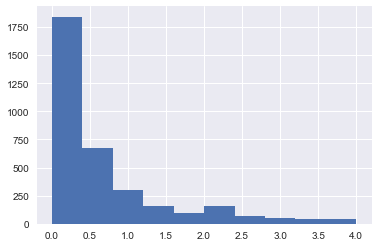

In [287]:
df = df[df["time_spent_mins"] <= 4]
plot = plt.hist(df["time_spent_mins"])
#plt.boxplot(new_df["time_spent_mins"])

len(df) 
# 1917 (22% reduced)
#sns.distplot(new_df["time_spent_mins"], color="g")

In [288]:
temp = 0
for index, row in df.iterrows():
    if row["activity_type"] == "SHARE":
        temp = row["shared_date"]
    else:
        if temp == 0:
            row["shared_date"] = row["last_activity_date"]
        else:
            row["shared_date"] = temp         

In [289]:
df['num_of_day_from_share_view'] = (df["last_activity_date"] - df["shared_date"]).astype(dt.timedelta).map(lambda x: 0 if pd.isnull(x) else x.days)


In [290]:
df = df[df['num_of_day_from_share_view']<2]

In [291]:
len(df)

3320

# SHARE DATA ANALYSIS

In [292]:
share_df = df[df.activity_type == "SHARE"]
share_df.columns

Index([u'activity_type', u'user_id', u'rm_id', u'viewing_device', u'browser',
       u'viewing_app_version', u'user_groups', u'shared_date', u'shared_time',
       u'title_of_content', u'share_channel', u'viewed',
       u'time_spent_in_seconds', u'last_activity_date', u'last_activity_time',
       u'weekday', u'weekday_name', u'month', u'time_of_day', u'hour',
       u'time_spent_mins', u'num_of_day_from_share_view'],
      dtype='object')

In [293]:
y_time_spent = share_df.groupby("weekday")["time_spent_mins"].sum()

<Container object of 6 artists>

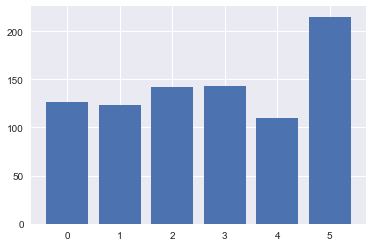

In [333]:
plt.bar(xrange(0,len(share_df.groupby("month")["rm_id"].count())), share_df.groupby("month")["rm_id"].count())

In [294]:
#sns.stripplot(x=share_df["weekday_name"], y=share_df["time_spent_mins"], data=share_df, jitter=True)

In [295]:
len(share_df), len(share_df.user_id.unique())

(859, 354)

In [336]:
len(share_df.rm_id.unique()), len(share_df)/float(len(share_df.rm_id.unique()))

(46, 18.67391304347826)

In [319]:
from collections import Counter
user_id_list_sh = [j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE"]
num_shares_dict = Counter(user_id_list_sh)
num_shares = [v for k,v in num_shares_dict.iteritems() if v<60]
# len(num_shares)
num_shares_dict, len(num_shares_dict)

(Counter({2386439.0: 5,
          2525350.0: 40,
          2685665.0: 43,
          2692754.0: 4,
          2733028.0: 4,
          2745016.0: 38,
          2745022.0: 1,
          2773361.0: 37,
          2813573.0: 20,
          2813582.0: 218,
          2838492.0: 4,
          2841324.0: 17,
          2856021.0: 2,
          2861821.0: 20,
          2865714.0: 57,
          2891523.0: 10,
          2926631.0: 21,
          2947850.0: 11,
          2956729.0: 9,
          2956846.0: 9,
          2956854.0: 2,
          2975145.0: 2,
          2975187.0: 2,
          2975237.0: 10,
          2975796.0: 61,
          2988808.0: 5,
          2988989.0: 9,
          3011871.0: 11,
          3028237.0: 1,
          3121220.0: 1,
          3146430.0: 5,
          3199114.0: 2,
          3267417.0: 4,
          3322677.0: 2,
          3661886.0: 28,
          3661903.0: 1,
          3661908.0: 4,
          3666636.0: 13,
          3999393.0: 1,
          5110696.0: 9,
          5253989.0: 2

In [320]:
np.array(num_shares).mean(), np.array(num_shares).min(), np.array(num_shares).max()


(11.162790697674419, 1, 57)

(array([ 24.,   8.,   2.,   3.,   1.,   0.,   3.,   1.,   0.,   1.]),
 array([  1. ,   6.6,  12.2,  17.8,  23.4,  29. ,  34.6,  40.2,  45.8,
         51.4,  57. ]),
 <a list of 10 Patch objects>)

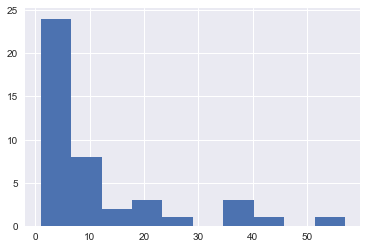

In [321]:
plt.hist(num_shares)

In [322]:
share_df.month.unique()

array([8, 7, 6, 5, 4, 3])

In [326]:
num_shares_mar = Counter([j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE" and j["month"] == 3])
#num_shares_dict = Counter(user_id_list_sh)
len(num_shares_mar), num_shares_mar

(24,
 Counter({2685665.0: 14,
          2745016.0: 7,
          2773361.0: 3,
          2813573.0: 6,
          2813582.0: 28,
          2841324.0: 6,
          2861821.0: 1,
          2865714.0: 15,
          2891523.0: 4,
          2926631.0: 2,
          2947850.0: 6,
          2956729.0: 4,
          2956846.0: 4,
          2975237.0: 3,
          2975796.0: 6,
          2988808.0: 1,
          2988989.0: 4,
          3011871.0: 2,
          3028237.0: 1,
          3121220.0: 1,
          3267417.0: 1,
          3661886.0: 2,
          3661903.0: 1,
          3661908.0: 4}))

In [328]:
num_shares_apr = Counter([j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE" and j["month"] == 4])
num_shares_may = Counter([j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE" and j["month"] == 5])
num_shares_jun = Counter([j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE" and j["month"] == 6])
num_shares_jul = Counter([j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE" and j["month"] == 7])
num_shares_aug = Counter([j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE" and j["month"] == 8])

len(num_shares_apr), num_shares_apr

(17,
 Counter({2386439.0: 1,
          2525350.0: 15,
          2685665.0: 5,
          2692754.0: 2,
          2745016.0: 12,
          2773361.0: 1,
          2813573.0: 9,
          2813582.0: 46,
          2841324.0: 2,
          2861821.0: 1,
          2865714.0: 8,
          2891523.0: 2,
          2947850.0: 3,
          2956846.0: 2,
          2975237.0: 4,
          2975796.0: 9,
          5110696.0: 1}))

In [329]:
len(num_shares_may), num_shares_may

(18,
 Counter({2525350.0: 18,
          2685665.0: 6,
          2745016.0: 13,
          2773361.0: 3,
          2813582.0: 53,
          2841324.0: 3,
          2861821.0: 3,
          2865714.0: 2,
          2891523.0: 1,
          2926631.0: 1,
          2956729.0: 4,
          2975796.0: 18,
          2988808.0: 2,
          2988989.0: 1,
          3011871.0: 4,
          3146430.0: 5,
          3267417.0: 1,
          5110696.0: 4}))

In [330]:
len(num_shares_jun), num_shares_jun

(22,
 Counter({2525350.0: 6,
          2685665.0: 12,
          2733028.0: 3,
          2745016.0: 2,
          2745022.0: 1,
          2773361.0: 18,
          2813582.0: 16,
          2841324.0: 5,
          2861821.0: 2,
          2865714.0: 23,
          2926631.0: 9,
          2947850.0: 1,
          2956729.0: 1,
          2956846.0: 1,
          2975237.0: 1,
          2975796.0: 20,
          2988808.0: 2,
          2988989.0: 2,
          3011871.0: 1,
          3666636.0: 12,
          5110696.0: 3,
          5253989.0: 2}))

In [331]:
len(num_shares_jul), num_shares_jul

(26,
 Counter({2386439.0: 4,
          2525350.0: 1,
          2685665.0: 4,
          2745016.0: 4,
          2773361.0: 10,
          2813573.0: 2,
          2813582.0: 15,
          2838492.0: 3,
          2841324.0: 1,
          2856021.0: 2,
          2861821.0: 4,
          2865714.0: 6,
          2891523.0: 3,
          2926631.0: 6,
          2956846.0: 2,
          2956854.0: 2,
          2975187.0: 1,
          2975237.0: 2,
          2975796.0: 5,
          2988989.0: 1,
          3267417.0: 2,
          3661886.0: 26,
          3666636.0: 1,
          3999393.0: 1,
          5110696.0: 1,
          5677458.0: 1}))

In [332]:
len(num_shares_aug), num_shares_aug

(23,
 Counter({2685665.0: 2,
          2692754.0: 2,
          2733028.0: 1,
          2773361.0: 2,
          2813573.0: 3,
          2813582.0: 60,
          2838492.0: 1,
          2861821.0: 9,
          2865714.0: 3,
          2926631.0: 3,
          2947850.0: 1,
          2975145.0: 2,
          2975187.0: 1,
          2975796.0: 3,
          2988989.0: 1,
          3011871.0: 4,
          3199114.0: 2,
          3322677.0: 2,
          5310845.0: 5,
          5646167.0: 4,
          5677458.0: 2,
          5747100.0: 2,
          5758519.0: 100}))

(array([ 809.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   50.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

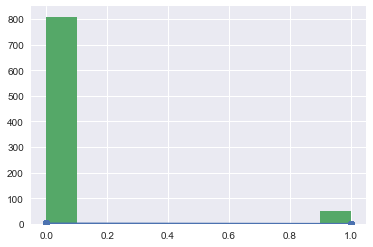

In [298]:
import pylab as pl
h = sorted(share_df["num_of_day_from_share_view"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h)

In [299]:
share_df.describe()

,user_id,rm_id,viewing_app_version,viewed,time_spent_in_seconds,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view
count,8.590000e+02,8.590000e+02,0.0,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,4.450344e+06,3.289871e+06,NaN,0.533178,34.989523,2.408615,5.736903,2.653085,10.677532,0.583159,0.058207
std,1.259635e+06,1.014522e+06,NaN,0.499189,54.202987,1.534975,1.766873,1.040340,7.345112,0.903383,0.234271
min,5.530080e+05,2.386439e+06,NaN,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,2.975145e+06,2.813582e+06,NaN,0.000000,0.000000,1.000000,4.000000,2.000000,5.000000,0.000000,0.000000
50%,5.082122e+06,2.841324e+06,NaN,1.000000,5.000000,2.000000,6.000000,3.000000,9.000000,0.083333,0.000000
75%,5.574764e+06,2.975796e+06,NaN,1.000000,45.000000,4.000000,7.500000,4.000000,18.000000,0.750000,0.000000
max,5.979633e+06,5.758519e+06,NaN,1.000000,240.000000,6.000000,8.000000,4.000000,23.000000,4.000000,1.000000


<module 'pylab' from '/Users/urmimukherjee/anaconda2/lib/python2.7/site-packages/pylab.pyc'>

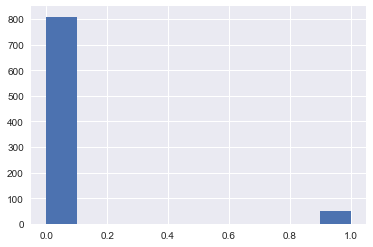

In [300]:
import pylab as pl
days_share_view = share_df[share_df["num_of_day_from_share_view"]<=7]
len(share_df),len(days_share_view)
h = sorted(days_share_view["num_of_day_from_share_view"]) #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

pl.hist(h)
pl

In [301]:
len(share_df),len(days_share_view)

(859, 859)

In [302]:
# uniq_titles = np.sort(share_df.title_of_content.unique())
# uniq_title_num_share = share_df.groupby("title_of_content")["activity_type"].count()
# #uniq_titles 
# uniq_title_num_share

In [303]:
# import pylab as pl
# h = sorted(share_df["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

# pl.hist(h,normed=True)


In [304]:
#share_df["weekday"].plot.kde()

In [305]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("weekday")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
# share_weekday = share_df.groupby("weekday")["time_spent_mins"].sum()

In [306]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("month")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [307]:
# import pylab as pl
# new_share = share_df[share_df["time_spent_mins"]<=8]
# h = sorted(new_share["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')
# pl.axvline(x=np.mean(h)+np.std(h),color='r', linestyle='--')
# pl.axvline(x=np.mean(h)-np.std(h),color='r', linestyle='--')
# pl.hist(h,normed=True)


In [308]:
#h = plt.hist(share_df.time_spent_mins)

In [309]:
#sns.stripplot(x="share_channel", y="time_spent_mins", data=share_df)
df.share_channel.unique()
share_df.share_channel.unique()

array(['WEB', 'OUTLOOK'], dtype=object)

([<matplotlib.axis.XTick at 0x1239ea2d0>,
 <a list of 2 Text xticklabel objects>)

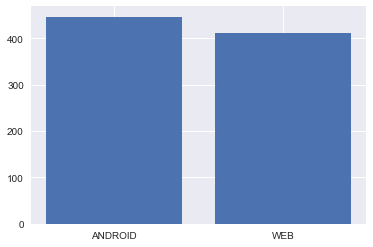

In [310]:
plt.bar(xrange(0,2),(share_df.groupby("share_channel")["time_spent_mins"].count()))
plt.xticks(xrange(0,2),["ANDROID","WEB"])
# plt.xlabel("Share Channel")
# plt.ylabel("Number of Shares")
# plt.title("TW - Num Shares Vs Share Channel")

In [311]:
#sns.stripplot(x="time_of_day", y="time_spent_mins", data=share_df)


# VIEW DATA ANALYSIS

In [312]:
view_df = df[(df.activity_type == "VIEW")]
view_df = view_df.drop(["share_channel", "user_groups", "shared_date", "shared_time", "rm_id"], axis =1)
view_df.describe()

,user_id,viewing_app_version,viewed,time_spent_in_seconds,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view
count,2.461000e+03,0.0,2461.0,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.0
mean,3.737598e+06,NaN,1.0,40.449004,2.120683,5.663958,2.549370,11.375457,0.674150,0.0
std,1.241957e+06,NaN,0.0,47.578044,1.533257,1.773231,1.191646,6.429198,0.792967,0.0
min,5.530080e+05,NaN,1.0,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.0
25%,2.841324e+06,NaN,1.0,10.000000,1.000000,4.000000,1.000000,6.000000,0.166667,0.0
50%,2.988808e+06,NaN,1.0,20.000000,2.000000,6.000000,3.000000,11.000000,0.333333,0.0
75%,5.185642e+06,NaN,1.0,50.000000,3.000000,7.000000,4.000000,16.000000,0.833333,0.0
max,5.979633e+06,NaN,1.0,240.000000,6.000000,8.000000,4.000000,23.000000,4.000000,0.0


In [313]:
len(view_df), len(view_df.user_id.unique())

(2461, 359)

In [314]:
view_df.columns

Index([u'activity_type', u'user_id', u'viewing_device', u'browser',
       u'viewing_app_version', u'title_of_content', u'viewed',
       u'time_spent_in_seconds', u'last_activity_date', u'last_activity_time',
       u'weekday', u'weekday_name', u'month', u'time_of_day', u'hour',
       u'time_spent_mins', u'num_of_day_from_share_view'],
      dtype='object')

In [225]:
len(view_df.title_of_content.unique())


253

In [335]:
views_per_share = len(view_df)/float(len(share_df))
views_per_share

2.8649592549476135

(array([ 1298.,   522.,   212.,   118.,    76.,   110.,    43.,    29.,
           20.,    33.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

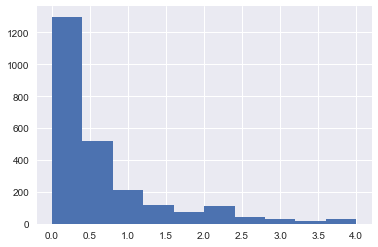

In [226]:
plt.hist(view_df["time_spent_mins"])

(array([    0.,     0.,     0.,     0.,     0.,  2461.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

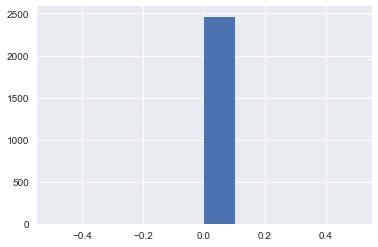

In [227]:
plt.hist(view_df["num_of_day_from_share_view"])

# NEW ANALYSIS -- Start

In [228]:
from collections import Counter
user_id_list = [j.user_id for i,j in df.iterrows() if j["activity_type"] == "VIEW"]
num_views = Counter(user_id_list)
best, views = {}, []
#best = sorted(num_views, key=lambda x : num_views[x])
for k,v in num_views.iteritems():
    if v<=20:
        best[k] = v
        views.append(v)


In [229]:
len(num_views), len(best), 

(359, 329)

(array([ 319.,   16.,   10.,    3.,    2.,    3.,    4.,    0.,    1.,    1.]),
 array([   1. ,   12.9,   24.8,   36.7,   48.6,   60.5,   72.4,   84.3,
          96.2,  108.1,  120. ]),
 <a list of 10 Patch objects>)

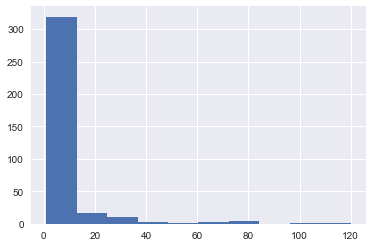

In [230]:
plt.hist([num_views[i] for i,j in num_views.iteritems() if num_views[i]>0])

In [231]:
best

{2525370: 1,
 2659829: 2,
 2659834: 2,
 2659891: 5,
 2692754: 16,
 2742799: 6,
 2745022: 1,
 2745028: 5,
 2773353: 3,
 2799569: 19,
 2810626: 3,
 2813573: 20,
 2825130: 2,
 2865714: 18,
 2879675: 4,
 2891523: 6,
 2928219: 1,
 2952311: 1,
 2954945: 6,
 2956846: 18,
 2971257: 5,
 2975145: 12,
 2975329: 4,
 2975341: 1,
 2983543: 9,
 2987022: 2,
 2988791: 5,
 3001996: 4,
 3008131: 4,
 3011871: 20,
 3015636: 1,
 3028237: 2,
 3029055: 8,
 3044804: 1,
 3054905: 2,
 3083086: 17,
 3107716: 2,
 3119041: 2,
 3121220: 18,
 3139309: 1,
 3140767: 2,
 3143946: 1,
 3146430: 3,
 3157225: 3,
 3199114: 8,
 3201579: 1,
 3216871: 1,
 3216970: 2,
 3226365: 2,
 3230795: 1,
 3252132: 4,
 3254106: 1,
 3267417: 5,
 3278471: 4,
 3278481: 4,
 3281763: 1,
 3287192: 3,
 3292036: 2,
 3295699: 4,
 3322677: 11,
 3324062: 2,
 3330854: 1,
 3330864: 6,
 3363060: 2,
 3465261: 1,
 3475107: 9,
 3498388: 2,
 3631954: 1,
 3649151: 4,
 3656397: 2,
 3656407: 2,
 3661886: 4,
 3661903: 9,
 3661908: 8,
 3666636: 9,
 3752979: 1,
 3

(array([ 186.,   80.,   30.,   11.,    6.,    6.,    1.,    1.,    5.,    3.]),
 array([  1. ,   2.9,   4.8,   6.7,   8.6,  10.5,  12.4,  14.3,  16.2,
         18.1,  20. ]),
 <a list of 10 Patch objects>)

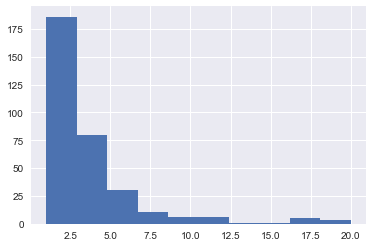

In [232]:
plt.hist(views)

In [233]:
conv_ids = []
for k,v in num_views.iteritems(): 
    if v>14 and v<20:
        conv_ids.append(k)
conv_ids, len(conv_ids)

([3121220, 2865714, 5203738, 3083086, 2956846, 2692754, 2799569], 7)

In [234]:
view_df["conv_id"] = view_df["viewed"]
test_df = view_df
conv_df = pd.DataFrame()
for i in xrange(len(conv_ids)):
    temp_df = view_df[view_df["user_id"] == conv_ids[i]]
    conv_df = conv_df.append(temp_df)
    test_df.drop(test_df["user_id"] == conv_ids[i])
    

In [235]:
conv_df.describe()

,user_id,viewing_app_version,viewed,time_spent_in_seconds,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view,conv_id
count,1.230000e+02,0.0,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.0,123.0
mean,3.236910e+06,NaN,1.0,39.146341,1.902439,5.975610,2.715447,10.512195,0.652439,0.0,1.0
std,8.030166e+05,NaN,0.0,44.448844,1.484425,1.830808,1.296403,5.838490,0.740814,0.0,0.0
min,2.692754e+06,NaN,1.0,5.000000,0.000000,3.000000,1.000000,0.000000,0.083333,0.0,1.0
25%,2.799569e+06,NaN,1.0,10.000000,1.000000,4.000000,1.000000,7.000000,0.166667,0.0,1.0
50%,2.956846e+06,NaN,1.0,20.000000,2.000000,7.000000,3.000000,10.000000,0.333333,0.0,1.0
75%,3.121220e+06,NaN,1.0,40.000000,3.000000,8.000000,4.000000,14.000000,0.666667,0.0,1.0
max,5.203738e+06,NaN,1.0,190.000000,6.000000,8.000000,4.000000,23.000000,3.166667,0.0,1.0


In [236]:
test_df["conv_id"].replace({1:0}, inplace= True)
for k,v in num_views.iteritems():
    test_df.loc[test_df['user_id'] == k, 'num_of_views'] = v
    test_df.loc[test_df['user_id'] == k, 'total_time_mins'] = test_df[test_df["user_id"] == k]["time_spent_mins"].sum()

test_df.weekday_name.replace({0:"Sunday", 1:"Monday"}, inplace= True)
test_df.head()

,activity_type,user_id,viewing_device,browser,viewing_app_version,title_of_content,viewed,time_spent_in_seconds,last_activity_date,last_activity_time,weekday,weekday_name,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view,conv_id,num_of_views,total_time_mins
0,VIEW,5677458,Laptop/Desktop,CHROME,NaN,ICP-10100 Datasheet v0.5 (002).pdf,1,20,2017-08-28,20:57:36,0,Monday,8,2,20,0.333333,0,0,28.0,19.00
1,VIEW,2975237,Laptop/Desktop,CHROME,NaN,ICM-30631 Datasheet,1,5,2017-08-28,20:48:50,0,Monday,8,2,20,0.083333,0,0,70.0,46.25
2,VIEW,2841324,Laptop/Desktop,CHROME,NaN,IAM-20680 v1.2 Datasheet & Register Map,1,100,2017-08-28,12:01:32,0,Monday,8,1,12,1.666667,0,0,37.0,28.00
5,VIEW,2841324,Laptop/Desktop,CHROME,NaN,IAM-20680 v1.2 Datasheet & Register Map,1,50,2017-08-28,11:56:49,0,Monday,8,4,11,0.833333,0,0,37.0,28.00
6,VIEW,2773361,Laptop/Desktop,CHROME,NaN,ICP-10100 EVB Application Note v1.0.pdf,1,110,2017-08-28,8:32:09,0,Monday,8,4,8,1.833333,0,0,99.0,85.50


In [237]:
test_df = view_df.append(conv_df)
test_df["weekday_name"].unique()

array(['Monday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday',
       'Sunday'], dtype=object)

In [238]:
test_df

,activity_type,browser,conv_id,hour,last_activity_date,last_activity_time,month,num_of_day_from_share_view,num_of_views,time_of_day,time_spent_in_seconds,time_spent_mins,title_of_content,total_time_mins,user_id,viewed,viewing_app_version,viewing_device,weekday,weekday_name
0,VIEW,CHROME,0,20,2017-08-28,20:57:36,8,0,28.0,2,20,0.333333,ICP-10100 Datasheet v0.5 (002).pdf,19.000000,5677458,1,NaN,Laptop/Desktop,0,Monday
1,VIEW,CHROME,0,20,2017-08-28,20:48:50,8,0,70.0,2,5,0.083333,ICM-30631 Datasheet,46.250000,2975237,1,NaN,Laptop/Desktop,0,Monday
2,VIEW,CHROME,0,12,2017-08-28,12:01:32,8,0,37.0,1,100,1.666667,IAM-20680 v1.2 Datasheet & Register Map,28.000000,2841324,1,NaN,Laptop/Desktop,0,Monday
5,VIEW,CHROME,0,11,2017-08-28,11:56:49,8,0,37.0,4,50,0.833333,IAM-20680 v1.2 Datasheet & Register Map,28.000000,2841324,1,NaN,Laptop/Desktop,0,Monday
6,VIEW,CHROME,0,8,2017-08-28,8:32:09,8,0,99.0,4,110,1.833333,ICP-10100 EVB Application Note v1.0.pdf,85.500000,2773361,1,NaN,Laptop/Desktop,0,Monday
7,VIEW,IE,0,8,2017-08-28,8:28:01,8,0,28.0,4,5,0.083333,TFS-2000 5-16-2017 Release.zip,16.083333,2956729,1,NaN,Laptop/Desktop,0,Monday
9,VIEW,IE,0,8,2017-08-28,8:26:24,8,0,28.0,4,5,0.083333,Software Release Notes - TFS-2000 UltraPrintSo...,16.083333,2956729,1,NaN,Laptop/Desktop,0,Monday
10,VIEW,CHROME,0,8,2017-08-28,8:24:08,8,0,99.0,4,135,2.250000,QR-000439 Columbo X1X1 Fingerprint Sensor Look...,85.500000,2773361,1,NaN,Laptop/Desktop,0,Monday
11,VIEW,CHROME,0,8,2017-08-28,8:23:55,8,0,99.0,4,10,0.166667,Image Collection_Specification_2.0.pdf,85.500000,2773361,1,NaN,Laptop/Desktop,0,Monday
12,VIEW,SAFARI,0,8,2017-08-28,8:00:11,8,0,3.0,4,10,0.166667,MPU-9250 Datasheet,2.833333,3837739,1,NaN,Laptop/Desktop,0,Monday


In [239]:
dummies = pd.get_dummies(test_df, columns=["viewing_device", "weekday_name", "time_of_day", "browser"])

In [240]:
test_df = pd.concat([test_df, dummies])
test_df = test_df.drop(["viewing_device", "weekday_name", "time_of_day", "browser"], axis=1)
test_df.describe()

,browser_CHROME,browser_CHROME_MOBILE,browser_EDGE,browser_FIREFOX,browser_IE,browser_MOBILE_SAFARI,browser_SAFARI,conv_id,hour,month,...,viewing_device_Phone,viewing_device_Tablet,weekday,weekday_name_Friday,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,5168.000000,5168.000000,5168.000000,...,2584.000000,2584.000000,5168.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,0.554954,0.009288,0.046827,0.080882,0.276703,0.011223,0.019737,0.047601,11.334365,5.678793,...,0.018576,0.003870,2.110294,0.155573,0.179567,0.052245,0.007740,0.196207,0.225619,0.183050
std,0.497067,0.095944,0.211308,0.272707,0.447455,0.105362,0.139121,0.212940,6.403294,1.776717,...,0.135048,0.062101,1.531246,0.362520,0.383900,0.222563,0.087653,0.397204,0.418070,0.386782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,6.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,7.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,8.000000,...,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [247]:
test_df.head()

,activity_type,browser_CHROME,browser_CHROME_MOBILE,browser_EDGE,browser_FIREFOX,browser_IE,browser_MOBILE_SAFARI,browser_SAFARI,conv_id,hour,...,viewing_device_Phone,viewing_device_Tablet,weekday,weekday_name_Friday,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
0,VIEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VIEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VIEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,12,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,VIEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,VIEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
test_df.fillna(0, inplace= True)
len(test_df)
x = test_df.as_matrix(columns= [u'time_of_day_1', u'time_of_day_2', u'time_of_day_3', u'time_of_day_4',u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday', 'num_of_views', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX',
       u'browser_IE', u'browser_MOBILE_SAFARI',
       u'browser_SAFARI'])
y = test_df.as_matrix(columns= ["time_spent_mins"])

In [254]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train[1]

array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [255]:
Model = LinearRegression()
Model.fit(x_train, y_train)
Model.predict(x_test)
Model.score(x_test,y_test), Model.coef_

(0.0034055375276940136,
 array([[ -3.67318081e-02,  -1.14452573e-02,  -1.02750027e-01,
          -9.31825596e-02,   3.49848246e-01,  -2.00167137e-01,
          -3.93790761e-01,  -8.80920793e-03,   8.88031665e-02,
          -1.04236905e-01,  -2.67352991e-01,   2.42184894e-02,
          -1.60915194e-02,   3.93593156e-02,  -5.44694240e-04,
          -2.76066212e-01,   9.92500406e-01,  -2.96409435e-01,
          -3.12763956e-01,  -3.31348334e-01,   3.32282787e-01,
          -3.52304908e-01]]))

In [256]:
conv_df.title_of_content.unique()

array(['ICM-20948 Datasheet/Register Map', 'UsabilityReport_2.0_ES.pdf',
       'ICG-20660 Datasheet & Register Map',
       'AN-000118 Fingerprint Sensor MT v1.0_Crutialtec.pdf',
       'DCT_test6.zip', 'TFS-2000 5-16-2017 Release.zip',
       'ICM-20690 Datasheet & Register Map', 'MPU-6500 Register Map',
       'TFS-2000 Ref Lamination Doc _ INVN.pdf',
       'AN-000118 Fingerprint Sensor MT v1.0',
       'DS-000218 TFS-2000G v0.2.pdf',
       'ICM-20600 Datasheet and Register Map', 'ICS-40730 Datasheet',
       'ICM-20302 Datasheet and Register Map', 'ICS-43434 Datasheet',
       'ICS-41350 Datasheet', 'ICS-51360 Datasheet',
       'IAM-20685 Datasheet & Register Map',
       'ICM-20602 Datasheet and Register Map',
       'ICM-20789 Datasheet and Register Map',
       'ICM-20603 Datasheet and Register Map', 'MPU-6050 Qual Report',
       'MPU-6050 Material DataSheet',
       'MPU-6050 Material Datasheet (Lingsen)', 'MPU-6000 MDS Lingsen',
       'AN-000094 TDM Microphone Array Demo 

In [257]:
len(conv_df)

123

([<matplotlib.axis.XTick at 0x11f70d9d0>,
 <a list of 9 Text xticklabel objects>)

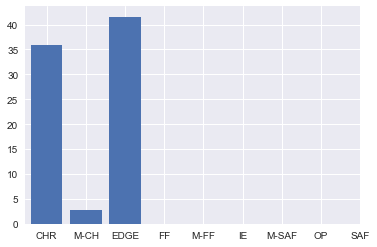

In [258]:
plt.bar(xrange(0,len(conv_df.groupby("browser")["time_spent_mins"].count())), conv_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

([<matplotlib.axis.XTick at 0x11aa35910>,
 <a list of 7 Text xticklabel objects>)

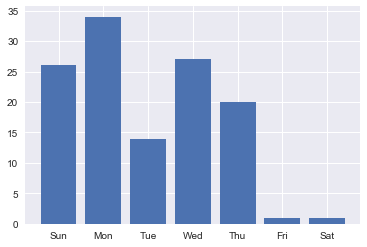

In [259]:
plt.bar(xrange(0,7), conv_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

([<matplotlib.axis.XTick at 0x120daa690>,
 <a list of 4 Text xticklabel objects>)

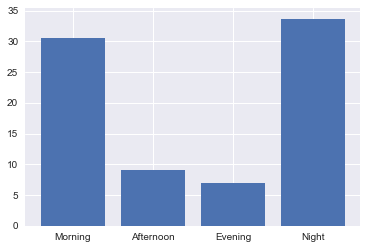

In [260]:
plt.bar(xrange(0,4), conv_df.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Morning", "Afternoon", "Evening", "Night"])

([<matplotlib.axis.XTick at 0x123f45210>,
 <a list of 2 Text xticklabel objects>)

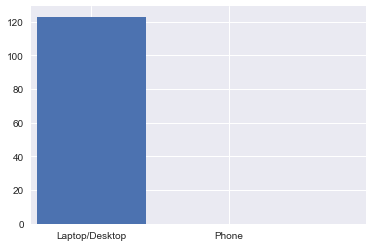

In [266]:
plt.bar(xrange(0,len(conv_df.groupby("viewing_device")["time_spent_mins"].count())), conv_df.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone"])

([<matplotlib.axis.XTick at 0x123d1a9d0>,
 <a list of 6 Text xticklabel objects>)

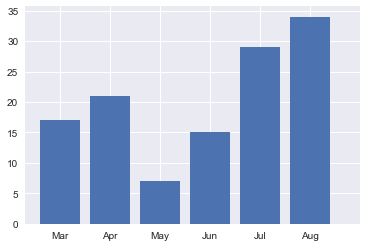

In [265]:
plt.bar(xrange(0,len(conv_df.groupby("month")["time_spent_mins"].count())), conv_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
#### import pylab as pl
new_view = view_df[view_df["time_spent_mins"] <= 6]
len(new_view) #(20 mins, 1874/2085, 10% reduced) (12 mins, 1746/2085, 16% reduced)(6 mins, 1607/2085, 23% reduced)
# (4 mins, 1513/2085, 28% reduced)

h = sorted(new_view["time_spent_mins"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h, normed= True)

pl.axvline(x = np.mean(h), linestyle='--')
pl.axvline(x = np.mean(h) + np.std(h), linestyle='--')
pl.axvline(x = np.mean(h) + 2*np.std(h), linestyle='--')


In [ ]:
new_view.describe()

In [ ]:
plt.hist(new_view["time_spent_mins"])

In [ ]:
sorted(view_df.browser.unique())

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), view_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])
# plt.xlabel("Viewing Application")
# plt.ylabel("Total View Time in Minutes")
# plt.title("Time Spent Vs View App")

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), new_view.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

In [ ]:
plt.bar(xrange(0,4), view_df.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])
# plt.xlabel("Time of Day")
# plt.ylabel("Total View Time in Minutes")
# plt.title("TW - Time Spent Vs Time of Day")

In [ ]:
plt.bar(xrange(0,4), new_view.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])

In [ ]:
def get_view_time_per_user(unique_users, view_df):
    for user in unique_users:
        temp_time = view_df["user_id"]

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
#plt.xlabel("Day of Week")
#plt.ylabel("Total View Time in Minutes")
#plt.title("TW - Time Spent Vs Day of Week")

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [ ]:
# Get the time spent on different apps
# def get_time_spent(view_df):
#     time_spent_secs = view_df["time_spent_in_seconds"].sum()
#     view_apps = view_df["view_app_group"].unique()

#     time_spent_dict = {}
#     for v in view_apps:
#         temp_time = view_df[view_df.view_app_group == v]["time_spent_in_seconds"].sum()
#         time_spent_dict[v] = [temp_time, float(temp_time)*100/time_spent_secs]
#     return time_spent_dict

# get_time_spent(view_df)

In [ ]:
plt.bar(xrange(0,3), view_df.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
#sns.stripplot(x="view_app_group", y="time_spent_mins", data=view_df)
#plt.bar(xrange(0,8), view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.boxplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.barplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.countplot(x="view_app_group", data=view_df, hue = "view_app_group")


In [ ]:
#plt.bar(xrange(0,9),view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.stripplot(x=view_df["view_app_group"], y=view_df["time_spent_mins"], data=view_df, jitter=True)


In [ ]:
#sns.stripplot(x=view_df["weekday"], y=view_df["time_spent_mins"], data=view_df, jitter=True)



In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
# clusterer = KMeans(n_clusters=7, random_state=10)
# clusterer.fit(X)

